# Testing models trained

In [4]:
import numpy as np
# Loading Test Data
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test.npy')

print(X_test.shape, t_test.shape)

(2880, 90000) (2880,)


## Downsample X_test from (300x300) to (50x50). Please note that this downsample will be used for the rest of the project

In [5]:
import cv2
# reshape data 
X = []
for i in range(X_test.shape[0]):
    # reshape training set
    im1 = X_test[i,:].reshape(300,300)
    res = cv2.resize(im1, dsize=(50,50), interpolation=cv2.INTER_CUBIC)
    X.append(res.reshape(2500))

X_test = X
np.shape(X_test)

(2880, 2500)

## Problem 1

### Part 1: Evaluate performance for RFE with logistic regression as the estimator

In [4]:
import joblib
#import trained model
pipe_M1_p1 = joblib.load('pipelines/pipe_Q1_M1');
pipe_M1_p1

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFE',
                 RFE(estimator=LogisticRegression(max_iter=20), step=10)),
                ('classifier', LogisticRegression(max_iter=20))])

In [11]:
#import list of pixels that are selected from RFE(binary mask)
binary_mask = joblib.load('lists/binary_mask_Q1_M1');
binary_mask

array([False, False, False, ..., False, False, False])

In [24]:
# import the list of pixels ranked from RFE
ranking1 = joblib.load('lists/ranking_Q1_M1');
ranking1

array([118, 116, 126, ...,  85,  82,  49])

#### Display which pixels are selected

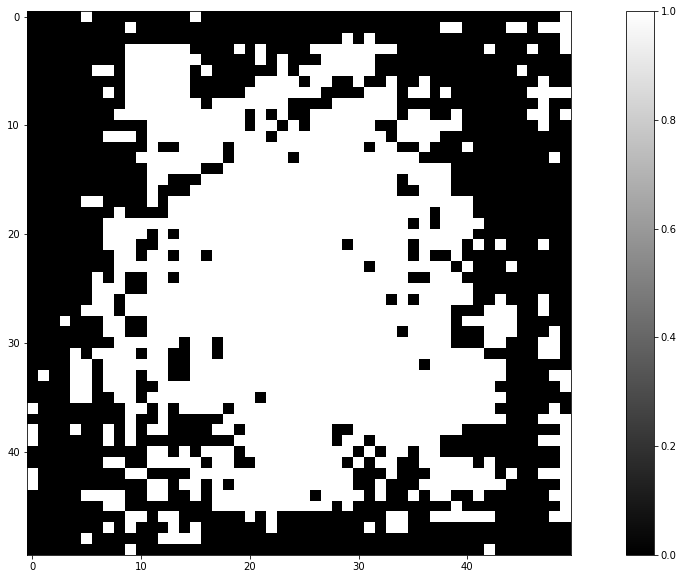

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
img = binary_mask.reshape(50,50);
plt.imshow(img, cmap='gray')
plt.colorbar();

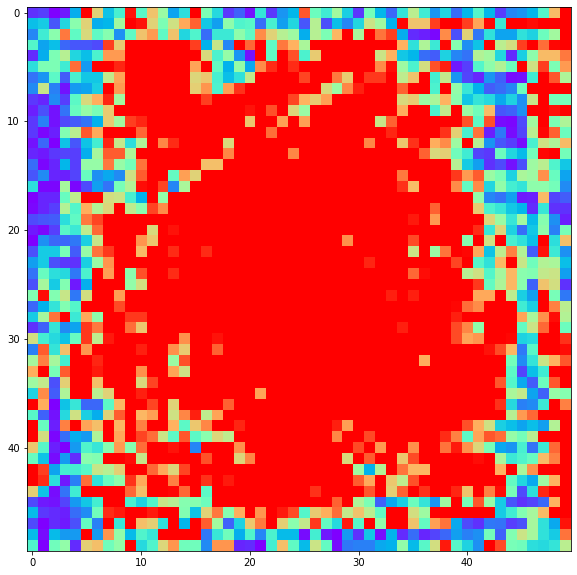

In [26]:
plt.figure(figsize=(20,10))
img = ranking1.reshape(50,50);
orig_map = plt.cm.get_cmap(plt.cm.rainbow);
reversed_map = orig_map.reversed();
plt.imshow(img, cmap=reversed_map);

In [7]:
# Apply transformations to test set
y_test_M1 = pipe_M1_p1.predict(X_test)

In [8]:
# Evaluate performance
from sklearn.metrics import classification_report

print('\n\nTest Set Performance')
print('Accuracy Score:', pipe_M1_p1.score(X_test,t_test)*100,'%') 
print('Performance Report: ')
print(classification_report(t_test,y_test_M1))
print('\n\n')



Test Set Performance
Accuracy Score: 40.763888888888886 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.41      0.44      0.42       275
         1.0       0.34      0.39      0.36       270
         2.0       0.41      0.49      0.45       287
         3.0       0.43      0.43      0.43       295
         4.0       0.37      0.35      0.36       309
         5.0       0.41      0.37      0.39       297
         6.0       0.45      0.45      0.45       291
         7.0       0.33      0.47      0.38       278
         8.0       0.49      0.33      0.39       292
         9.0       0.52      0.37      0.44       286

    accuracy                           0.41      2880
   macro avg       0.42      0.41      0.41      2880
weighted avg       0.42      0.41      0.41      2880






### Part 2: Evaluate performance for RFE with decison tree as the estimator

In [15]:
#import trained model
pipe_M2_p1 = joblib.load('pipelines/pipe_Q1_M2');
pipe_M2_p1

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFE',
                 RFE(estimator=DecisionTreeClassifier(max_depth=40,
                                                      min_samples_leaf=10),
                     step=20)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=40, min_samples_leaf=10))])

In [16]:
#import list of pixels that are selected from RFE(binary mask)
binary_mask2 = joblib.load('lists/binary_mask_Q1_M2');
binary_mask2

array([ True,  True,  True, ..., False, False, False])

In [27]:
# import the list of pixels ranked from RFE
ranking2 = joblib.load('lists/ranking_Q1_M2');
ranking2

array([ 1,  1,  1, ..., 52, 57, 62])

#### Display which pixels are selected

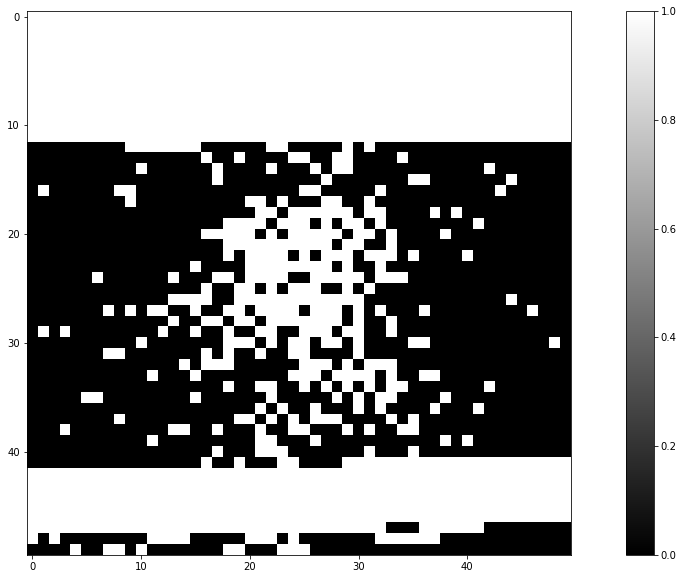

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
img = binary_mask2.reshape(50,50);
plt.imshow(img, cmap='gray')
plt.colorbar();

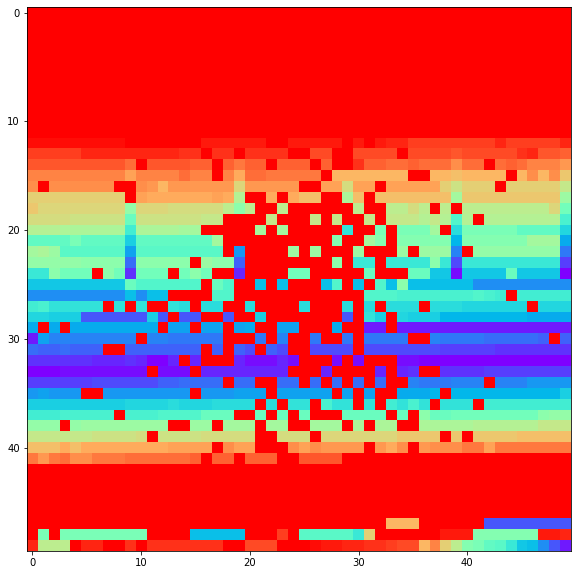

In [29]:
plt.figure(figsize=(20,10))
img = ranking2.reshape(50,50);
orig_map = plt.cm.get_cmap(plt.cm.rainbow);
reversed_map = orig_map.reversed();
plt.imshow(img, cmap=reversed_map);

In [17]:
# Apply transformations to test set
y_test_M2 = pipe_M2_p1.predict(X_test)

In [30]:
# Evaluate performance

print('\n\nTest Set Performance')
print('Accuracy Score:', pipe_M2_p1.score(X_test,t_test)*100,'%') 
print('Performance Report: ')
print(classification_report(t_test,y_test_M2))
print('\n\n')



Test Set Performance
Accuracy Score: 22.67361111111111 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.24      0.24      0.24       275
         1.0       0.16      0.21      0.19       270
         2.0       0.31      0.36      0.33       287
         3.0       0.17      0.18      0.18       295
         4.0       0.28      0.27      0.28       309
         5.0       0.22      0.20      0.21       297
         6.0       0.20      0.17      0.18       291
         7.0       0.19      0.21      0.20       278
         8.0       0.25      0.18      0.21       292
         9.0       0.26      0.22      0.24       286

    accuracy                           0.23      2880
   macro avg       0.23      0.23      0.23      2880
weighted avg       0.23      0.23      0.23      2880






## Problem 2

### Part 1: Evaluate performance on original dataset (SVM with no PCA)

In [1]:
import joblib
#import trained model
pipe_M1_p2 = joblib.load('pipelines/pipe_Q2_nPCA');
pipe_M1_p2

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(class_weight='balanced'))])

In [7]:
from time import time
# Predict the labels for the test set and measure the time for
# classifier on original dataset (no PCA)
t0 = time()
y_test1 = pipe_M1_p2.predict(X_test)
t1 = time()

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Test prediction time with no PCA: %.2g sec " % (t1-t0))
print('Accuracy in Test:', accuracy_score(t_test, y_test1)*100,'%\n')
print('Performance Report: ')
print(classification_report(t_test,y_test1))
print('\n\n')

Test prediction time with no PCA: 19 sec 
Accuracy in Test: 42.46527777777778 %

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.35      0.48      0.41       275
         1.0       0.37      0.39      0.38       270
         2.0       0.33      0.66      0.44       287
         3.0       0.52      0.44      0.48       295
         4.0       0.53      0.31      0.39       309
         5.0       0.39      0.38      0.38       297
         6.0       0.55      0.45      0.50       291
         7.0       0.39      0.39      0.39       278
         8.0       0.55      0.35      0.43       292
         9.0       0.51      0.41      0.45       286

    accuracy                           0.42      2880
   macro avg       0.45      0.43      0.42      2880
weighted avg       0.45      0.42      0.42      2880






### Part 2: Evaluate performance on reduced dataset (SVM with PCA)

In [9]:
#import trained model
pipe_M2_p2 = joblib.load('pipelines/pipe_Q2_PCA');
pipe_M2_p2

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=185)),
                ('SVM', SVC(class_weight='balanced'))])

In [10]:
# Predict the labels for the test set and measure the time for
# classifier on reduced dataset
t0 = time()
y_test2 = pipe_M2_p2.predict(X_test)
t1 = time()

In [11]:
print("Test prediction time with PCA: %.2g sec " % (t1-t0))
print('Accuracy in Test:', accuracy_score(t_test, y_test2)*100,'%\n')
print('Performance Report: ')
print(classification_report(t_test,y_test2))
print('\n\n')

Test prediction time with PCA: 3.5 sec 
Accuracy in Test: 43.854166666666664 %

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.37      0.49      0.42       275
         1.0       0.40      0.41      0.40       270
         2.0       0.35      0.66      0.45       287
         3.0       0.53      0.45      0.49       295
         4.0       0.56      0.34      0.42       309
         5.0       0.41      0.40      0.40       297
         6.0       0.53      0.46      0.49       291
         7.0       0.38      0.38      0.38       278
         8.0       0.56      0.38      0.45       292
         9.0       0.53      0.42      0.47       286

    accuracy                           0.44      2880
   macro avg       0.46      0.44      0.44      2880
weighted avg       0.46      0.44      0.44      2880






#### Discussion

The results from the testing dataset differ a lot from the training set evaluations. In the training set, the accuracy for the original dataset with no PCA was higher than the reduced dataset, but in the test set, the accuracy score is higher for the reduced dataset. The prediction time is still longer for the original dataset than with the reduced dataset. Based on these results, training a classifier on a reduced dataset using PCA with SVM seems to result in better performance during testing in terms of computational time and accuracy.

## Problem 4

### Part 1: Evaluate performance of ISOMAP with logisitic regression

In [20]:
import joblib
# Load reduced dimensional test set with isomap n_components=1250
proj_1250_iso = joblib.load('lists/proj_1250_test_Q4');
# Load preprocessing pipeline for Part 4 ISOMAP(with logistic regession classifier)
pipe_p4_iso = joblib.load('pipelines/pipe_Q4_iso');

In [21]:
# Apply transformations to test set
y_test_iso = pipe_p4_iso.predict(proj_1250_iso)

In [22]:
# Evaluate performance
from sklearn.metrics import classification_report

print('\n\nTest Set Performance')
print('Accuracy Score:', pipe_p4_iso.score(proj_1250_iso,t_test)*100,'%') 
print('Performance Report: ')
print(classification_report(t_test,y_test_iso))
print('\n\n')



Test Set Performance
Accuracy Score: 9.583333333333334 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.09      0.09      0.09       275
         1.0       0.12      0.13      0.13       270
         2.0       0.13      0.14      0.14       287
         3.0       0.09      0.09      0.09       295
         4.0       0.06      0.05      0.05       309
         5.0       0.11      0.10      0.10       297
         6.0       0.05      0.05      0.05       291
         7.0       0.09      0.09      0.09       278
         8.0       0.09      0.10      0.10       292
         9.0       0.12      0.13      0.12       286

    accuracy                           0.10      2880
   macro avg       0.10      0.10      0.10      2880
weighted avg       0.09      0.10      0.10      2880






In [28]:
print("Accuracy score for Classifier on 1250 dimensions: ")
pipe_p4_iso.fit(proj_1250_iso, t_test)
print((pipe_p4_iso.named_steps['classifier'].score(proj_1250_iso,t_test)*100))

Accuracy score for Classifier on 1250 dimensions: 
50.763888888888886


/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Part 2: Evaluate performance of LLE with logisitic regression

In [24]:
# Load reduced dimensional test set with lle n_components=1250
proj_1250_lle = joblib.load('lists/proj_1250_lle_test_Q4');
# Load preprocessing pipeline for Part 4 LLE(with logistic regession classifier)
pipe_p4_lle = joblib.load('pipelines/pipe_Q4_lle');


In [25]:
# Apply transformations to test set
y_test_lle = pipe_p4_lle.predict(proj_1250_lle)

In [26]:
# Evaluate performance
from sklearn.metrics import classification_report

print('\n\nTest Set Performance')
print('Accuracy Score:', pipe_p4_lle.score(proj_1250_lle,t_test)*100,'%') 
print('Performance Report: ')
print(classification_report(t_test,y_test_lle))
print('\n\n')



Test Set Performance
Accuracy Score: 10.833333333333334 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.11      0.10      0.11       275
         1.0       0.10      0.13      0.11       270
         2.0       0.09      0.09      0.09       287
         3.0       0.14      0.15      0.15       295
         4.0       0.10      0.09      0.09       309
         5.0       0.13      0.13      0.13       297
         6.0       0.13      0.12      0.12       291
         7.0       0.08      0.08      0.08       278
         8.0       0.09      0.09      0.09       292
         9.0       0.10      0.10      0.10       286

    accuracy                           0.11      2880
   macro avg       0.11      0.11      0.11      2880
weighted avg       0.11      0.11      0.11      2880






In [29]:
print("Accuracy score for Classifier on 1250 dimensions: ")
pipe_p4_lle.fit(proj_1250_lle, t_test)
print((pipe_p4_lle.named_steps['classifier'].score(proj_1250_lle,t_test)*100))

Accuracy score for Classifier on 1250 dimensions: 
21.666666666666668


/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Part 3: Evaluate performance of MDS with logisitic regression

In [37]:
# Load reduced dimensional test set with mds n_components=2
proj_2_mds = joblib.load('lists/proj_2_mds_test_Q4');
# Load preprocessing pipeline for Part 4 (with logistic regession classifier)
pipe_p4_mds = joblib.load('pipelines/pipe_Q4_mds');

In [38]:
# Apply transformations to test set
y_test_mds = pipe_p4_mds.predict(proj_2_mds)

In [39]:
print('\n\nTest Set Performance')
print('Accuracy Score:', pipe_p4_mds.score(proj_2_mds,t_test)*100,'%') 
print('Performance Report: ')
print(classification_report(t_test,y_test_mds))
print('\n\n')



Test Set Performance
Accuracy Score: 9.756944444444445 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.09      0.18      0.12       275
         1.0       0.10      0.19      0.13       270
         2.0       0.00      0.00      0.00       287
         3.0       0.00      0.00      0.00       295
         4.0       0.00      0.00      0.00       309
         5.0       0.13      0.02      0.03       297
         6.0       0.08      0.02      0.03       291
         7.0       0.10      0.20      0.13       278
         8.0       0.09      0.07      0.08       292
         9.0       0.11      0.34      0.16       286

    accuracy                           0.10      2880
   macro avg       0.07      0.10      0.07      2880
weighted avg       0.07      0.10      0.07      2880






/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print("Accuracy score for Classifier on 2 dimensions: ")
pipe_p4_mds.fit(proj_2_mds, t_test)
print((pipe_p4_mds.named_steps['classifier'].score(proj_2_mds,t_test)*100))

Accuracy score for Classifier on 2 dimensions: 
11.11111111111111


Looking at the results, ISOMAP performed best in making predictions, but the accuracy score when the classifier is applied is the lowest out of the three. ISOMAP performed the best when the test data is transformed, having the highest accuracy score out of the three and also performed faster than MDS.